In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
preprocessing.LabelEncoder()
import random
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option("display.max_columns", None)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout, BatchNormalization
from keras.layers import Dense, SimpleRNN


In [ ]:
df1 = pd.read_csv('/content/new_ideation.csv')
data1=df1.drop(['Illeagal sexual cantact last year','Substance use last month','Alcohol use last month','Suicide attempt last year','Educational group 2','Smoking last month','Internet days/week','Telegram','Instagram','WhatsUp','Viber','FaceBook','Line','Linkdin','Twiter','Yahoo','Imo','Skype','Clash Royal','Clash of Clans','Quiz of Kings','Other games','Time for cheking email (min)','Time for cheking social network (min)','Time for playing game (min)','Time for online entertainment (min)','Time for downloading multimedia (min)','Time for online shopping (min)','Time for spending online for others (min)','Time for cheking news (min)','IATgr2'],axis='columns')
data1

,City,Sex,Age (yr),Marital status,Residential location,College,Score of last semester,Internet time hour/day,Social network user,Online games,hopeless to future career,Pysical symptomes,Anxiety and sleep disorders,Social performance,Depression symptomes,GPIUS2 group Problematic Internet Use,GHQgr2,Suicide ideation last month
0,1,1,20,1,0,1,15.0000,2,1,0,0,0,1,2,1,1,1,0
1,2,1,24,1,0,2,17.6800,2,0,0,0,0,1,1,1,1,1,0
2,3,1,22,0,0,2,17.0000,10,1,0,0,1,2,1,1,1,1,0
3,2,1,22,0,1,2,16.2200,1,1,0,0,1,3,2,1,1,0,0
4,1,1,22,0,0,4,16.5000,3,1,0,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4256,0,1,25,0,0,2,16.5000,4,1,0,1,1,1,2,2,1,1,0
4257,6,0,24,0,0,5,16.0000,1,1,0,0,0,2,2,1,1,1,0
4258,3,1,21,0,0,3,16.3902,7,1,1,0,0,2,2,1,1,1,0
4259,3,1,25,0,0,2,16.5000,4,1,0,1,1,1,2,2,1,1,0


In [ ]:
x_f1 = data1.iloc[:, :17]
y_f1 = data1.iloc[:, 17]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
pdata1 = pd.DataFrame(sc.fit_transform(x_f1),columns=x_f1.columns,index=x_f1.index)
xn1 = pdata1.iloc[:, :]

In [ ]:
from sklearn.model_selection import train_test_split
x_res1 ,x_test1 , y_res1 ,y_test1= train_test_split(xn1,y_f1,test_size=0.30,random_state=25)
print(x_res1.shape ,x_test1.shape , y_res1.shape ,y_test1.shape)

(2982, 17) (1279, 17) (2982,) (1279,)


In [ ]:
from imblearn.over_sampling import SMOTE
over1 = SMOTE(random_state = 2, sampling_strategy=0.35)
x_train1, y_train1 = over1.fit_resample(x_res1, y_res1.ravel())
#under = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
x_train1 = x_train1.to_numpy()
x_test1 = x_test1.to_numpy()

In [ ]:
sample_size1 = x_train1.shape[0] # number of samples in train set
time_steps1  = x_train1.shape[1] # number of features in train set
input_dimension1 = 1               # each feature is represented by 1 number

train_data_reshaped1 = x_train1.reshape(sample_size1,time_steps1,input_dimension1)
print("After reshape train data set shape:\n", train_data_reshaped1.shape)
print("1 Sample shape:\n",train_data_reshaped1[0].shape)
print("An example sample:\n", train_data_reshaped1[0])

After reshape train data set shape:
 (3715, 17, 1)
1 Sample shape:
 (17, 1)
An example sample:
 [[0.08333333]
 [0.        ]
 [0.21428571]
 [0.        ]
 [0.        ]
 [0.125     ]
 [0.33333333]
 [0.41666667]
 [1.        ]
 [1.        ]
 [0.        ]
 [0.66666667]
 [0.33333333]
 [0.        ]
 [0.66666667]
 [0.        ]
 [0.        ]]


In [ ]:
test_data_reshaped1 = x_test1.reshape(x_test1.shape[0],x_test1.shape[1],1)

In [ ]:
def build_conv1D_model():

  n_timesteps1 = train_data_reshaped1.shape[1] #17
  n_features1  = train_data_reshaped1.shape[2] #1
  model1 = keras.Sequential(name="model1_conv1D")
  model1.add(keras.layers.Input(shape=(n_timesteps1,n_features1)))
  model1.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model1.add(keras.layers.Dropout(0.5))
  model1.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))

  model1.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))

  model1.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model1.add(keras.layers.Flatten())
  model1.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model1.add(keras.layers.Dense(n_features1, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model1.compile(loss='mse',optimizer=optimizer,metrics=['accuracy'])
  return model1

model1_conv1D = build_conv1D_model()
model1_conv1D.summary()

Model: "model1_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)                    │ (None, 11, 64)              │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1D_2 (Conv1D)                    │ (None, 9, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1D_3 (Conv1D)                    │ (None, 8, 16)               │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling1D (MaxPooling1D)          │ (None, 4, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,841 (38.44 KB)

 Trainable params: 9,841 (38.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Store training stats
history1 = model1_conv1D.fit(train_data_reshaped1, y_train1, epochs=400,validation_split=0.2, verbose=1)

Epoch 1/400
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9240 - loss: 0.0703 - val_accuracy: 0.0121 - val_loss: 0.7719
Epoch 2/400
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9249 - loss: 0.0657 - val_accuracy: 0.0121 - val_loss: 0.7763
Epoch 3/400
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9185 - loss: 0.0690 - val_accuracy: 0.0121 - val_loss: 0.7637
Epoch 4/400
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9268 - loss: 0.0635 - val_accuracy: 0.0256 - val_loss: 0.6278
Epoch 5/400
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9223 - loss: 0.0673 - val_accuracy: 0.0283 - val_loss: 0.6203
Epoch 6/400
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9231 - loss: 0.0673 - val_accuracy: 0.0121 - val_loss: 0.7851
Epoch 7/400
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9285 - loss: 0.0618 - val_accuracy: 0.0834 - val_loss: 0.5532
Epoch 8/400
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9215 - loss: 0.0659 - val_accuracy: 0.0121 

In [ ]:
y_test1=y_test1.to_numpy()

In [ ]:
# Store training stats
history_test1 = model1_conv1D.fit(test_data_reshaped1, y_test1, epochs=100)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9406 - loss: 0.0554
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9487 - loss: 0.0477
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9367 - loss: 0.0549
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9487 - loss: 0.0449
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9477 - loss: 0.0434
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9513 - loss: 0.0445
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9439 - loss: 0.0462
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9512 - loss: 0.0407
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9562 - loss: 0.0407
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9513 - loss: 0.0410
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9558 - loss: 0.0397
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

yhat_probs1 = model1_conv1D.predict(test_data_reshaped1, verbose=0)
yhat_classes1 = np.argmax(yhat_probs1, axis=1)
yhat_probs1 = yhat_probs1[:, 0]
#yhat_classes = yhat_classes[:]
yhat_classes1 = np.round(abs(yhat_probs1))
print("Classification Report is:\n",classification_report(y_test1,yhat_classes1))


Classification Report is:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1196
           1       1.00      0.60      0.75        83

    accuracy                           0.97      1279
   macro avg       0.99      0.80      0.87      1279
weighted avg       0.97      0.97      0.97      1279



In [ ]:
df2 = pd.read_csv('/content/new_attempt.csv')

In [ ]:
data2=df2.drop(['Illeagal sexual cantact last year','Substance use last month','Suicide ideation last month','Alcohol use last month','Educational group 2','Smoking last month','Internet days/week','Telegram','Instagram','WhatsUp','Viber','FaceBook','Line','Linkdin','Twiter','Yahoo','Imo','Skype','Clash Royal','Clash of Clans','Quiz of Kings','Other games','Time for cheking email (min)','Time for cheking social network (min)','Time for playing game (min)','Time for online entertainment (min)','Time for downloading multimedia (min)','Time for online shopping (min)','Time for spending online for others (min)','Time for cheking news (min)','IATgr2'],axis='columns')

In [ ]:
x_f2 = data2.iloc[:, :17]
y_f2 = data2.iloc[:, 17]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
pdata2=pd.DataFrame(sc.fit_transform(x_f2),columns=x_f2.columns,index=x_f2.index)
xn2 = pdata2.iloc[:, :]

In [ ]:
from sklearn.model_selection import train_test_split
x_res2 ,x_test2 , y_res2 ,y_test2= train_test_split(xn2,y_f2,test_size=0.30,random_state=25)
print(x_res2.shape ,x_test2.shape , y_res2.shape ,y_test2.shape)

(2982, 17) (1279, 17) (2982,) (1279,)


In [ ]:
from imblearn.over_sampling import SMOTE
over2 = SMOTE(random_state = 2, sampling_strategy=0.35)
x_train2, y_train2 = over2.fit_resample(x_res2, y_res2.ravel())
#under = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
x_train2 = x_train2.to_numpy()
x_test2 = x_test2.to_numpy()

In [ ]:
sample_size2 = x_train2.shape[0] # number of samples in train set
time_steps2  = x_train2.shape[1] # number of features in train set
input_dimension2 = 1               # each feature is represented by 1 number

train_data_reshaped2 = x_train2.reshape(sample_size2,time_steps2,input_dimension2)
print("After reshape train data set shape:\n", train_data_reshaped2.shape)
print("1 Sample shape:\n",train_data_reshaped2[0].shape)
print("An example sample:\n", train_data_reshaped2[0])

After reshape train data set shape:
 (3947, 17, 1)
1 Sample shape:
 (17, 1)
An example sample:
 [[0.33333333]
 [0.        ]
 [0.25      ]
 [0.        ]
 [0.        ]
 [0.5       ]
 [0.36444444]
 [0.08333333]
 [1.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]]


In [ ]:
test_data_reshaped2 = x_test2.reshape(x_test2.shape[0],x_test2.shape[1],1)

In [ ]:
def build_conv1D_model():

  n_timesteps2 = train_data_reshaped2.shape[1] #17
  n_features2  = train_data_reshaped2.shape[2] #1
  model2 = keras.Sequential(name="model2_conv1D")
  model2.add(keras.layers.Input(shape=(n_timesteps2,n_features2)))
  model2.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model2.add(keras.layers.Dropout(0.5))
  model2.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))

  model2.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))

  model2.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model2.add(keras.layers.Flatten())
  model2.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model2.add(keras.layers.Dense(n_features2, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model2.compile(loss='mse',optimizer=optimizer,metrics=['accuracy'])
  return model2

model2_conv1D = build_conv1D_model()
model2_conv1D.summary()

Model: "model2_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)                    │ (None, 11, 64)              │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1D_2 (Conv1D)                    │ (None, 9, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1D_3 (Conv1D)                    │ (None, 8, 16)               │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling1D (MaxPooling1D)          │ (None, 4, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,841 (38.44 KB)

 Trainable params: 9,841 (38.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Store training stats
history2 = model2_conv1D.fit(train_data_reshaped2, y_train2, epochs=400,validation_split=0.2, verbose=1)

Epoch 1/400
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9260 - loss: 0.0668 - val_accuracy: 0.0000e+00 - val_loss: 0.7839
Epoch 2/400
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9306 - loss: 0.0606 - val_accuracy: 0.0000e+00 - val_loss: 0.7300
Epoch 3/400
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9322 - loss: 0.0569 - val_accuracy: 0.0203 - val_loss: 0.8127
Epoch 4/400
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9327 - loss: 0.0583 - val_accuracy: 0.0886 - val_loss: 0.6841
Epoch 5/400
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9438 - loss: 0.0507 - val_accuracy: 0.1076 - val_loss: 0.6338
Epoch 6/400
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9352 - loss: 0.0552 - val_accuracy: 0.0962 - val_loss: 0.6664
Epoch 7/400
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9453 - loss: 0.0491 - val_accuracy: 0.1114 - val_loss: 0.5755
Epoch 8/400
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9310 - loss: 0.0555 - val_accuracy: 0.

In [ ]:
y_test2=y_test2.to_numpy()

In [ ]:
# Store training stats
history_test2 = model2_conv1D.fit(test_data_reshaped2, y_test2, epochs=100)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9876 - loss: 0.0107
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9939 - loss: 0.0066
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9892 - loss: 0.0098
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9959 - loss: 0.0044
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9958 - loss: 0.0042
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9931 - loss: 0.0085
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9907 - loss: 0.0088
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9946 - loss: 0.0042
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9919 - loss: 0.0064
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9947 - loss: 0.0053
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9918 - loss: 0.0080
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

yhat_probs2 = model2_conv1D.predict(test_data_reshaped2, verbose=0)
yhat_classes2 = np.argmax(yhat_probs2, axis=1)
yhat_probs2 = yhat_probs2[:, 0]
#yhat_classes = yhat_classes[:]
yhat_classes2 = np.round(abs(yhat_probs2))
print("Classification Report is:\n",classification_report(y_test2,yhat_classes2))


Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1262
           1       1.00      0.82      0.90        17

    accuracy                           1.00      1279
   macro avg       1.00      0.91      0.95      1279
weighted avg       1.00      1.00      1.00      1279



In [ ]:
df3 = pd.read_csv('/content/new_alcohol.csv')
data3=df3.drop(['Illeagal sexual cantact last year','Substance use last month','Suicide ideation last month','Suicide attempt last year','Educational group 2','Smoking last month','Internet days/week','Telegram','Instagram','WhatsUp','Viber','FaceBook','Line','Linkdin','Twiter','Yahoo','Imo','Skype','Clash Royal','Clash of Clans','Quiz of Kings','Other games','Time for cheking email (min)','Time for cheking social network (min)','Time for playing game (min)','Time for online entertainment (min)','Time for downloading multimedia (min)','Time for online shopping (min)','Time for spending online for others (min)','Time for cheking news (min)','IATgr2'],axis='columns')

In [ ]:
x_f3 = data3.iloc[:, :17]
y_f3 = data3.iloc[:, 17]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
pdata3=pd.DataFrame(sc.fit_transform(x_f3),columns=x_f3.columns,index=x_f3.index)
xn3 = pdata3.iloc[:, :]

In [ ]:
from sklearn.model_selection import train_test_split
x_res3 ,x_test3 , y_res3 ,y_test3= train_test_split(xn3,y_f3,test_size=0.30,random_state=25)
print(x_res3.shape ,x_test3.shape , y_res3.shape ,y_test3.shape)

(2982, 17) (1279, 17) (2982,) (1279,)


In [ ]:
from imblearn.over_sampling import SMOTE
over3 = SMOTE(random_state = 2, sampling_strategy=0.35)
x_train3, y_train3 = over3.fit_resample(x_res3, y_res3.ravel())
#under = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
x_train3 = x_train3.to_numpy()
x_test3 = x_test3.to_numpy()

In [ ]:
sample_size3 = x_train3.shape[0] # number of samples in train set
time_steps3  = x_train3.shape[1] # number of features in train set
input_dimension3 = 1               # each feature is represented by 1 number

train_data_reshaped3 = x_train3.reshape(sample_size3,time_steps3,input_dimension3)
print("After reshape train data set shape:\n", train_data_reshaped3.shape)
print("1 Sample shape:\n",train_data_reshaped3[0].shape)
print("An example sample:\n", train_data_reshaped3[0])

After reshape train data set shape:
 (3688, 17, 1)
1 Sample shape:
 (17, 1)
An example sample:
 [[0.08333333]
 [0.        ]
 [0.21428571]
 [0.        ]
 [0.        ]
 [0.125     ]
 [0.33333333]
 [0.41666667]
 [1.        ]
 [1.        ]
 [0.        ]
 [0.66666667]
 [0.33333333]
 [0.        ]
 [0.66666667]
 [0.        ]
 [0.        ]]


In [ ]:
test_data_reshaped3 = x_test3.reshape(x_test3.shape[0],x_test3.shape[1],1)

In [ ]:
def build_conv1D_model():

  n_timesteps3 = train_data_reshaped3.shape[1] #17
  n_features3  = train_data_reshaped3.shape[2] #1
  model3 = keras.Sequential(name="model3_conv1D")
  model3.add(keras.layers.Input(shape=(n_timesteps3,n_features3)))
  model3.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model3.add(keras.layers.Dropout(0.5))
  model3.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))

  model3.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))

  model3.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model3.add(keras.layers.Flatten())
  model3.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model3.add(keras.layers.Dense(n_features3, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model3.compile(loss='mse',optimizer=optimizer,metrics=['accuracy'])
  return model3

model3_conv1D = build_conv1D_model()
model3_conv1D.summary()

Model: "model3_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)                    │ (None, 11, 64)              │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1D_2 (Conv1D)                    │ (None, 9, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1D_3 (Conv1D)                    │ (None, 8, 16)               │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling1D (MaxPooling1D)          │ (None, 4, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,841 (38.44 KB)

 Trainable params: 9,841 (38.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Store training stats
history3 = model3_conv1D.fit(train_data_reshaped3, y_train3, epochs=400,validation_split=0.2, verbose=1)

Epoch 1/400
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9112 - loss: 0.0809 - val_accuracy: 0.0407 - val_loss: 0.7568
Epoch 2/400
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9121 - loss: 0.0779 - val_accuracy: 0.0407 - val_loss: 0.7362
Epoch 3/400
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9140 - loss: 0.0751 - val_accuracy: 0.0407 - val_loss: 0.8009
Epoch 4/400
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9176 - loss: 0.0724 - val_accuracy: 0.0407 - val_loss: 0.7477
Epoch 5/400
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9188 - loss: 0.0700 - val_accuracy: 0.0407 - val_loss: 0.8284
Epoch 6/400
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9159 - loss: 0.0735 - val_accuracy: 0.0407 - val_loss: 0.7691
Epoch 7/400
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9205 - loss: 0.0692 - val_accuracy: 0.0447 - val_loss: 0.7479
Epoch 8/400
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9185 - loss: 0.0723 - val_accuracy: 0.0528 - v

In [ ]:
y_test3=y_test3.to_numpy()

In [ ]:
# Store training stats
history_test3 = model3_conv1D.fit(test_data_reshaped3, y_test3, epochs=100)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9327 - loss: 0.0592
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9487 - loss: 0.0444
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9440 - loss: 0.0485
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9348 - loss: 0.0542
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9525 - loss: 0.0411
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9537 - loss: 0.0417
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9489 - loss: 0.0444
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9584 - loss: 0.0380
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9536 - loss: 0.0406
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9413 - loss: 0.0497
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9613 - loss: 0.0344
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

yhat_probs3 = model3_conv1D.predict(test_data_reshaped3, verbose=0)
yhat_classes3 = np.argmax(yhat_probs3, axis=1)
yhat_probs3 = yhat_probs3[:, 0]
#yhat_classes = yhat_classes[:]
yhat_classes3 = np.round(abs(yhat_probs3))
print("Classification Report is:\n",classification_report(y_test3,yhat_classes3))


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1194
         1.0       1.00      0.60      0.75        85
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97      1279
   macro avg       0.66      0.53      0.58      1279
weighted avg       0.97      0.97      0.97      1279



In [ ]:
df4 = pd.read_csv('/content/new_substance.csv')
data4=df4.drop(['Illeagal sexual cantact last year','Suicide ideation last month','Suicide attempt last year','Alcohol use last month','Educational group 2','Smoking last month','Internet days/week','Telegram','Instagram','WhatsUp','Viber','FaceBook','Line','Linkdin','Twiter','Yahoo','Imo','Skype','Clash Royal','Clash of Clans','Quiz of Kings','Other games','Time for cheking email (min)','Time for cheking social network (min)','Time for playing game (min)','Time for online entertainment (min)','Time for downloading multimedia (min)','Time for online shopping (min)','Time for spending online for others (min)','Time for cheking news (min)','IATgr2'],axis='columns')


In [ ]:
x_f4 = data4.iloc[:, :17]
y_f4 = data4.iloc[:, 17]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
pdata4=pd.DataFrame(sc.fit_transform(x_f4),columns=x_f4.columns,index=x_f4.index)
xn4 = pdata4.iloc[:, :]

In [ ]:
from sklearn.model_selection import train_test_split
x_res4 ,x_test4 , y_res4 ,y_test4= train_test_split(xn4,y_f4,test_size=0.30,random_state=25)
print(x_res4.shape ,x_test4.shape , y_res4.shape ,y_test4.shape)

(2982, 17) (1279, 17) (2982,) (1279,)


In [ ]:
from imblearn.over_sampling import SMOTE
over4 = SMOTE(random_state = 2, sampling_strategy=0.35)
x_train4, y_train4 = over4.fit_resample(x_res4, y_res4.ravel())
#under = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
x_train4 = x_train4.to_numpy()
x_test4 = x_test4.to_numpy()

In [ ]:
sample_size4 = x_train4.shape[0] # number of samples in train set
time_steps4  = x_train4.shape[1] # number of features in train set
input_dimension4 = 1               # each feature is represented by 1 number

train_data_reshaped4 = x_train4.reshape(sample_size4,time_steps4,input_dimension4)
print("After reshape train data set shape:\n", train_data_reshaped4.shape)
print("1 Sample shape:\n",train_data_reshaped4[0].shape)
print("An example sample:\n", train_data_reshaped4[0])

After reshape train data set shape:
 (3812, 17, 1)
1 Sample shape:
 (17, 1)
An example sample:
 [[0.08333333]
 [0.        ]
 [0.21428571]
 [0.        ]
 [0.        ]
 [0.125     ]
 [0.33333333]
 [0.41666667]
 [1.        ]
 [1.        ]
 [0.        ]
 [0.66666667]
 [0.33333333]
 [0.        ]
 [0.66666667]
 [0.        ]
 [0.        ]]


In [ ]:
test_data_reshaped4 = x_test4.reshape(x_test4.shape[0],x_test4.shape[1],1)

In [ ]:
def build_conv1D_model():

  n_timesteps4 = train_data_reshaped4.shape[1] #17
  n_features4  = train_data_reshaped4.shape[2] #1
  model4 = keras.Sequential(name="model4_conv1D")
  model4.add(keras.layers.Input(shape=(n_timesteps4,n_features4)))
  model4.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model4.add(keras.layers.Dropout(0.5))
  model4.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))

  model4.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))

  model4.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model4.add(keras.layers.Flatten())
  model4.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model4.add(keras.layers.Dense(n_features4, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model4.compile(loss='mse',optimizer=optimizer,metrics=['accuracy'])
  return model4

model4_conv1D = build_conv1D_model()
model4_conv1D.summary()

Model: "model4_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)                    │ (None, 11, 64)              │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1D_2 (Conv1D)                    │ (None, 9, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1D_3 (Conv1D)                    │ (None, 8, 16)               │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling1D (MaxPooling1D)          │ (None, 4, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,841 (38.44 KB)

 Trainable params: 9,841 (38.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Store training stats
history4 = model4_conv1D.fit(train_data_reshaped4, y_train4, epochs=400,validation_split=0.2, verbose=1)

Epoch 1/400
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9332 - loss: 0.0642 - val_accuracy: 0.0000e+00 - val_loss: 0.9174
Epoch 2/400
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9299 - loss: 0.0640 - val_accuracy: 0.0000e+00 - val_loss: 0.8376
Epoch 3/400
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9265 - loss: 0.0661 - val_accuracy: 0.0000e+00 - val_loss: 0.7326
Epoch 4/400
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9275 - loss: 0.0642 - val_accuracy: 0.0000e+00 - val_loss: 0.7451
Epoch 5/400
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9173 - loss: 0.0715 - val_accuracy: 0.0000e+00 - val_loss: 0.8486
Epoch 6/400
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9142 - loss: 0.0740 - val_accuracy: 0.0000e+00 - val_loss: 0.8096
Epoch 7/400
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9247 - loss: 0.0651 - val_accuracy: 0.0000e+00 - val_loss: 0.7657
Epoch 8/400
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9217 - loss: 0.066

In [ ]:
y_test4=y_test4.to_numpy()

In [ ]:
# Store training stats
history_test4 = model4_conv1D.fit(test_data_reshaped4, y_test4, epochs=100)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.0309
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9617 - loss: 0.0341
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9705 - loss: 0.0248
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9659 - loss: 0.0302
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9702 - loss: 0.0258
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9634 - loss: 0.0308
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9705 - loss: 0.0265
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9551 - loss: 0.0394
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9724 - loss: 0.0274
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9709 - loss: 0.0271
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9766 - loss: 0.0219
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

yhat_probs4 = model4_conv1D.predict(test_data_reshaped4, verbose=0)
yhat_classes4 = np.argmax(yhat_probs4, axis=1)
yhat_probs4 = yhat_probs4[:, 0]
#yhat_classes = yhat_classes[:]
yhat_classes4 = np.round(abs(yhat_probs4))
print("Classification Report is:\n",classification_report(y_test4,yhat_classes4))


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1227
         1.0       0.94      0.58      0.71        52
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      1279
   macro avg       0.64      0.53      0.57      1279
weighted avg       0.98      0.98      0.98      1279



In [ ]:
df5 = pd.read_csv('/content/new_sexual.csv')
data5=df5.drop(['Substance use last month','Alcohol use last month','Suicide ideation last month','Suicide attempt last year','Educational group 2','Smoking last month','Internet days/week','Telegram','Instagram','WhatsUp','Viber','FaceBook','Line','Linkdin','Twiter','Yahoo','Imo','Skype','Clash Royal','Clash of Clans','Quiz of Kings','Other games','Time for cheking email (min)','Time for cheking social network (min)','Time for playing game (min)','Time for online entertainment (min)','Time for downloading multimedia (min)','Time for online shopping (min)','Time for spending online for others (min)','Time for cheking news (min)','IATgr2'],axis='columns')

In [ ]:
x_f5 = data5.iloc[:, :17]
y_f5 = data5.iloc[:, 17]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
pdata5=pd.DataFrame(sc.fit_transform(x_f5),columns=x_f5.columns,index=x_f5.index)
xn5 = pdata5.iloc[:, :]

In [ ]:
from sklearn.model_selection import train_test_split
x_res5 ,x_test5 , y_res5 ,y_test5= train_test_split(xn5,y_f5,test_size=0.30,random_state=25)
print(x_res5.shape ,x_test5.shape , y_res5.shape ,y_test5.shape)

(2982, 17) (1279, 17) (2982,) (1279,)


In [ ]:
from imblearn.over_sampling import SMOTE
over5 = SMOTE(random_state = 2, sampling_strategy=0.35)
x_train5, y_train5 = over5.fit_resample(x_res5, y_res5.ravel())
#under = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
x_train5 = x_train5.to_numpy()
x_test5 = x_test5.to_numpy()

In [ ]:
sample_size5 = x_train5.shape[0] # number of samples in train set
time_steps5  = x_train5.shape[1] # number of features in train set
input_dimension5 = 1               # each feature is represented by 1 number

train_data_reshaped5 = x_train5.reshape(sample_size5,time_steps5,input_dimension5)
print("After reshape train data set shape:\n", train_data_reshaped5.shape)
print("1 Sample shape:\n",train_data_reshaped5[0].shape)
print("An example sample:\n", train_data_reshaped5[0])

After reshape train data set shape:
 (3723, 17, 1)
1 Sample shape:
 (17, 1)
An example sample:
 [[0.08333333]
 [0.        ]
 [0.21428571]
 [0.        ]
 [0.        ]
 [0.125     ]
 [0.33333333]
 [0.41666667]
 [1.        ]
 [1.        ]
 [0.        ]
 [0.66666667]
 [0.33333333]
 [0.        ]
 [0.66666667]
 [0.        ]
 [0.        ]]


In [ ]:
test_data_reshaped5 = x_test5.reshape(x_test5.shape[0],x_test5.shape[1],1)

In [ ]:
def build_conv1D_model():

  n_timesteps5 = train_data_reshaped5.shape[1] #17
  n_features5  = train_data_reshaped5.shape[2] #1
  model5 = keras.Sequential(name="model5_conv1D")
  model5.add(keras.layers.Input(shape=(n_timesteps5,n_features5)))
  model5.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model5.add(keras.layers.Dropout(0.5))
  model5.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))

  model5.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))

  model5.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model5.add(keras.layers.Flatten())
  model5.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model5.add(keras.layers.Dense(n_features5, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model5.compile(loss='mse',optimizer=optimizer,metrics=['accuracy'])
  return model5

model5_conv1D = build_conv1D_model()
model5_conv1D.summary()

Model: "model5_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)                    │ (None, 11, 64)              │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1D_2 (Conv1D)                    │ (None, 9, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1D_3 (Conv1D)                    │ (None, 8, 16)               │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling1D (MaxPooling1D)          │ (None, 4, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,841 (38.44 KB)

 Trainable params: 9,841 (38.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Store training stats
history5 = model5_conv1D.fit(train_data_reshaped5, y_train5, epochs=400,validation_split=0.2, verbose=1)

Epoch 1/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9327 - loss: 0.0625 - val_accuracy: 0.0054 - val_loss: 0.8305
Epoch 2/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9284 - loss: 0.0642 - val_accuracy: 0.0054 - val_loss: 0.7959
Epoch 3/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9299 - loss: 0.0623 - val_accuracy: 0.0054 - val_loss: 0.7966
Epoch 4/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9263 - loss: 0.0658 - val_accuracy: 0.0054 - val_loss: 0.8486
Epoch 5/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9239 - loss: 0.0669 - val_accuracy: 0.0054 - val_loss: 0.8054
Epoch 6/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9220 - loss: 0.0682 - val_accuracy: 0.0054 - val_loss: 0.7417
Epoch 7/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9246 - loss: 0.0641 - val_accuracy: 0.0054 - val_loss: 0.8107
Epoch 8/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9236 - loss: 0.0653 - val_accuracy: 0.0054 - 

In [ ]:
y_test5=y_test5.to_numpy()

In [ ]:
# Store training stats
history_test5 = model5_conv1D.fit(test_data_reshaped5, y_test5, epochs=100)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9360 - loss: 0.0552
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9446 - loss: 0.0535
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9473 - loss: 0.0450
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9281 - loss: 0.0549
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9509 - loss: 0.0439
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9627 - loss: 0.0374
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9530 - loss: 0.0472
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9383 - loss: 0.0509
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9528 - loss: 0.0431
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9427 - loss: 0.0498
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9398 - loss: 0.0517
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

yhat_probs5 = model5_conv1D.predict(test_data_reshaped5, verbose=0)
yhat_classes5 = np.argmax(yhat_probs5, axis=1)
yhat_probs5 = yhat_probs5[:, 0]
#yhat_classes = yhat_classes[:]
yhat_classes5 = np.round(abs(yhat_probs5))
print("Classification Report is:\n",classification_report(y_test5,yhat_classes5))


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1171
         1.0       0.97      0.71      0.82       108
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97      1279
   macro avg       0.65      0.57      0.60      1279
weighted avg       0.97      0.97      0.97      1279



In [ ]:
df6 = pd.read_csv('/content/new_IATgr2.csv')
data6=df6.drop(['Illeagal sexual cantact last year','Substance use last month','Suicide ideation last month','Suicide attempt last year','Educational group 2','Smoking last month','Internet days/week','Telegram','Instagram','WhatsUp','Viber','FaceBook','Line','Linkdin','Twiter','Yahoo','Imo','Skype','Clash Royal','Clash of Clans','Quiz of Kings','Other games','Time for cheking email (min)','Time for cheking social network (min)','Time for playing game (min)','Time for online entertainment (min)','Time for downloading multimedia (min)','Time for online shopping (min)','Time for spending online for others (min)','Time for cheking news (min)','Alcohol use last month'],axis='columns')

In [ ]:
x_f6 = data6.iloc[:, :17]
y_f6 = data6.iloc[:, 17]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
pdata6=pd.DataFrame(sc.fit_transform(x_f6),columns=x_f6.columns,index=x_f6.index)
xn6 = pdata6.iloc[:, :]

In [ ]:
from sklearn.model_selection import train_test_split
x_res6 ,x_test6 , y_res6 ,y_test6= train_test_split(xn6,y_f6,test_size=0.30,random_state=25)
print(x_res6.shape ,x_test6.shape , y_res6.shape ,y_test6.shape)

(2982, 17) (1279, 17) (2982,) (1279,)


In [ ]:
from imblearn.over_sampling import SMOTE
over6 = SMOTE(random_state = 2, sampling_strategy=0.35)
x_train6, y_train6 = over6.fit_resample(x_res6, y_res6.ravel())
#under = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
x_train6 = x_train6.to_numpy()
x_test6 = x_test6.to_numpy()

In [ ]:
sample_size6 = x_train6.shape[0] # number of samples in train set
time_steps6  = x_train6.shape[1] # number of features in train set
input_dimension6 = 1               # each feature is represented by 1 number

train_data_reshaped6 = x_train6.reshape(sample_size6,time_steps6,input_dimension6)
print("After reshape train data set shape:\n", train_data_reshaped6.shape)
print("1 Sample shape:\n",train_data_reshaped6[0].shape)
print("An example sample:\n", train_data_reshaped6[0])

After reshape train data set shape:
 (3053, 17, 1)
1 Sample shape:
 (17, 1)
An example sample:
 [[0.08333333]
 [0.        ]
 [0.21428571]
 [0.        ]
 [0.        ]
 [0.125     ]
 [0.33333333]
 [0.41666667]
 [1.        ]
 [1.        ]
 [0.        ]
 [0.66666667]
 [0.33333333]
 [0.        ]
 [0.66666667]
 [0.        ]
 [0.        ]]


In [ ]:
test_data_reshaped6 = x_test6.reshape(x_test6.shape[0],x_test6.shape[1],1)

In [ ]:
def build_conv1D_model():

  n_timesteps6 = train_data_reshaped6.shape[1] #17
  n_features6  = train_data_reshaped6.shape[2] #1
  model6 = keras.Sequential(name="model6_conv1D")
  model6.add(keras.layers.Input(shape=(n_timesteps6,n_features6)))
  model6.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model6.add(keras.layers.Dropout(0.5))
  model6.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))

  model6.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))

  model6.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model6.add(keras.layers.Flatten())
  model6.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model6.add(keras.layers.Dense(n_features6, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model6.compile(loss='mse',optimizer=optimizer,metrics=['accuracy'])
  return model6

model6_conv1D = build_conv1D_model()
model6_conv1D.summary()

Model: "model6_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)                    │ (None, 11, 64)              │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1D_2 (Conv1D)                    │ (None, 9, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1D_3 (Conv1D)                    │ (None, 8, 16)               │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling1D (MaxPooling1D)          │ (None, 4, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,841 (38.44 KB)

 Trainable params: 9,841 (38.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Store training stats
history6 = model6_conv1D.fit(train_data_reshaped6, y_train6, epochs=400,validation_split=0.2, verbose=1)

Epoch 1/400
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6383 - loss: 0.2549 - val_accuracy: 0.7267 - val_loss: 0.1851
Epoch 2/400
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7692 - loss: 0.1574 - val_accuracy: 0.6792 - val_loss: 0.2007
Epoch 3/400
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7834 - loss: 0.1464 - val_accuracy: 0.7447 - val_loss: 0.1648
Epoch 4/400
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7897 - loss: 0.1464 - val_accuracy: 0.7087 - val_loss: 0.1853
Epoch 5/400
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7943 - loss: 0.1438 - val_accuracy: 0.7610 - val_loss: 0.1616
Epoch 6/400
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7888 - loss: 0.1440 - val_accuracy: 0.7103 - val_loss: 0.1828
Epoch 7/400
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7964 - loss: 0.1392 - val_accuracy: 0.7529 - val_loss: 0.1619
Epoch 8/400
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7943 - loss: 0.1429 - val_accuracy: 0.7480 - v

In [ ]:
y_test6=y_test6.to_numpy()

In [ ]:
# Store training stats
history_test6 = model6_conv1D.fit(test_data_reshaped6, y_test6, epochs=100)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8435 - loss: 0.1265
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8468 - loss: 0.1169
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8631 - loss: 0.1057
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8506 - loss: 0.1149
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8560 - loss: 0.1089
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8662 - loss: 0.1072
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8645 - loss: 0.0956
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8719 - loss: 0.0979
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8607 - loss: 0.1063
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8515 - loss: 0.1076
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9039 - loss: 0.0840
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

yhat_probs6 = model6_conv1D.predict(test_data_reshaped6, verbose=0)
yhat_classes6 = np.argmax(yhat_probs6, axis=1)
yhat_probs6 = yhat_probs6[:, 0]
#yhat_classes = yhat_classes[:]
yhat_classes6 = np.round(abs(yhat_probs6))
print("Classification Report is:\n",classification_report(y_test6,yhat_classes6))


Classification Report is:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       321
           1       0.96      0.99      0.97       958

    accuracy                           0.96      1279
   macro avg       0.96      0.93      0.94      1279
weighted avg       0.96      0.96      0.96      1279



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test1,yhat_probs1)
print('roc_auc_score1: ', roc_auc_score(y_test1,yhat_probs1))

false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test2,yhat_probs2)
print('roc_auc_score2: ', roc_auc_score(y_test2,yhat_probs2))

false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test3,yhat_probs3)
print('roc_auc_score3: ', roc_auc_score(y_test3,yhat_probs3))

false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test4,yhat_probs4)
print('roc_auc_score4: ', roc_auc_score(y_test4,yhat_probs4))

false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test5,yhat_probs5)
print('roc_auc_score5: ', roc_auc_score(y_test5,yhat_probs5))

false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test6,yhat_probs6)
print('roc_auc_score6: ', roc_auc_score(y_test6,yhat_probs6))


roc_auc_score1:  0.9852218237498489
roc_auc_score2:  0.9859699822876853
roc_auc_score3:  0.9864814267415508
roc_auc_score4:  0.9768509811297097
roc_auc_score5:  0.9815052028971756
roc_auc_score6:  0.984638297595588


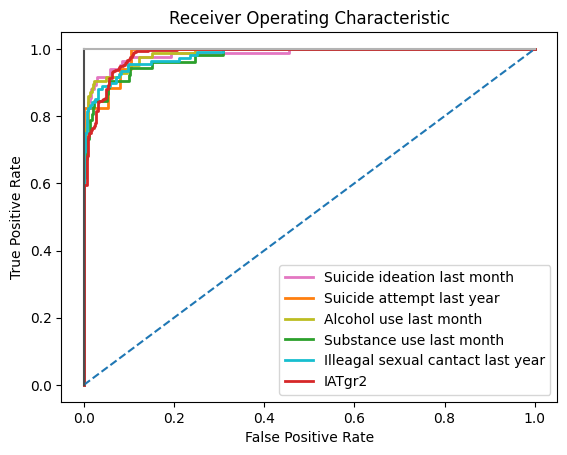

In [ ]:


plt.subplots(1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1, color='#e377c2', linewidth=2, markersize=12, label='Suicide ideation last month')
plt.plot(false_positive_rate2, true_positive_rate2, color='#ff7f0e', linewidth=2, markersize=12, label='Suicide attempt last year')
plt.plot(false_positive_rate3, true_positive_rate3, color='#bcbd22', linewidth=2, markersize=12, label='Alcohol use last month')
plt.plot(false_positive_rate4, true_positive_rate4, color='#2ca02c', linewidth=2, markersize=12, label='Substance use last month')
plt.plot(false_positive_rate5, true_positive_rate5, color='#17becf', linewidth=2, markersize=12, label='Illeagal sexual cantact last year')
plt.plot(false_positive_rate6, true_positive_rate6, color='#d62728', linewidth=2, markersize=12, label='IATgr2')
plt.legend(loc='best')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".3"), plt.plot([1,1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
classes_in=[0,1]
y_hat=model1_conv1D.predict(test_data_reshaped1)#test the model, prob.

y_hat_cl = y_hat.argmax(1) #prob. to class
CM=np.zeros([len(classes_in),len(classes_in)])# Confusion matrix,
for k in range(y_test1.shape[0]):
    CM[y_test1[k],y_hat_cl[k]]=CM[y_test1[k],y_hat_cl[k]]+1

# Display confusion matrix
print("Confusion Matrix:")
for i in range(len(classes_in)):
    row_str = "| "
    for j in range(len(classes_in)):
        row_str += f"{int(CM[i, j]):>4} | "
    print(row_str)
print('Acc=',np.sum(y_hat_cl==y_test1)/y_test1.shape[0])

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
| 1196 |    0 | 
|   83 |    0 | 
Acc= 0.9351055512118843


In [ ]:
pip install shap

In [ ]:
import shap
from shap.plots import beeswarm
explainer = shap.KernelExplainer(model1_conv1D.predict,train_data_reshaped1)

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


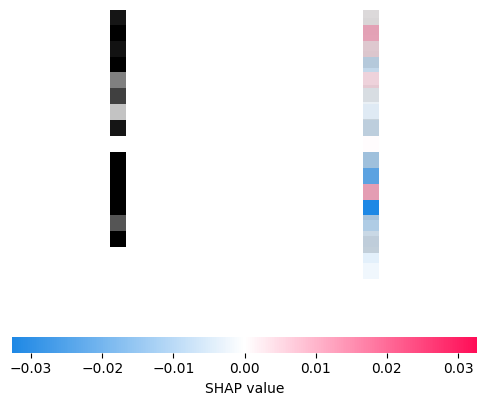

In [ ]:
background = train_data_reshaped1[np.random.choice(train_data_reshaped1.shape[0], 100, replace=False)]
e = shap.DeepExplainer(model1_conv1D, background)
ind=[800]
shap_values = e.shap_values( train_data_reshaped1[ind])
shap.image_plot(shap_values,train_data_reshaped1[ind])


In [ ]:
shap_values

array([[[[-2.71202215e-03]],

        [[-1.63425051e-02]],

        [[-1.47452567e-03]],

        [[-1.05157849e-02]],

        [[-2.00107215e-02]],

        [[ 7.05460725e-03]],

        [[ 8.61674482e-04]],

        [[-5.81833884e-03]],

        [[-3.86361312e-05]],

        [[-4.29249154e-02]],

        [[-1.36541342e-02]],

        [[ 1.76175237e-02]],

        [[-4.15365646e-02]],

        [[-6.18338156e-03]],

        [[-3.38965265e-02]],

        [[-3.20261436e-03]],

        [[-2.03360733e-02]]]])

In [ ]:
shap.plots.waterfall(shap_values, max_display=14)

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.